# JEM092 - Asset Pricing HW1 - Pavlína Křenková & Tomáš Svoboda

In [4]:
# libraries
shhh = suppressPackageStartupMessages #load quietly
shhh(library(quantmod))
shhh(library(dplyr))
shhh(library(httr))
shhh(library(rvest))
shhh(library(xts))
shhh(library(stringr))
shhh(library(jsonlite))

Warning message:
"package 'rvest' was built under R version 4.3.3"


## Task 1: Downloading the data

In [19]:
# Load the tickers
zip_path = "data_HW1.zip"
csv_file = "98698413_data_download.csv" # Pavlina's student number
temp = tempfile() # temporary file path for unzipping
unzip(zip_path, files = csv_file, exdir = temp) # unzip into the temp directory
csv_path = file.path(temp, csv_file)
tickers = read.csv(csv_path)
unlink(temp, recursive = TRUE) # just a clean-up: delete temp directory

In [4]:
head(tickers)
summary(tickers)

,X,x
,<int>,<chr>
1,1,UDR
2,2,CPB
3,3,MTB
4,4,BMY
5,5,EFX
6,6,CHRW


       X               x            
 Min.   :  1.00   Length:250        
 1st Qu.: 63.25   Class :character  
 Median :125.50   Mode  :character  
 Mean   :125.50                     
 3rd Qu.:187.75                     
 Max.   :250.00                     

### (1) Adjusted closing prices and volume

To get the closing prices and volume from yahoo we iterate over the list of stocks and use the *getSymbols* function from quantmod package. The result is a list *`price_volume_xts`* of xts objects, one for each firm.

In [20]:
start_date = as.Date("2010-01-01")
end_date = as.Date("2024-02-29") # it is exclusive of this day

tickers_data = list() # store in a list, we will have 250 elements - xts objects

for(ticker in tickers$x) {
  symb = getSymbols(ticker, src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE) # get the data
  
  tickers_data[[ticker]] = symb # store in the list under name of the stock
}
head(tickers_data$UDR) # example
tail(tickers_data$UDR) # example

           UDR.Open UDR.High UDR.Low UDR.Close UDR.Volume UDR.Adjusted
2010-01-04    16.56    16.71   16.14     16.21    1835200     9.739023
2010-01-05    16.20    16.30   16.01     16.19    1665600     9.727007
2010-01-06    16.22    16.42   15.96     16.08    1889000     9.660916
2010-01-07    16.04    16.42   15.82     16.20    1792000     9.733016
2010-01-08    16.04    16.18   15.77     15.88    1099800     9.540758
2010-01-11    16.09    16.25   15.96     15.99    1531200     9.606846

           UDR.Open UDR.High UDR.Low UDR.Close UDR.Volume UDR.Adjusted
2024-02-21    35.85    36.33   35.66     36.30    2890100     35.89002
2024-02-22    36.45    36.45   36.10     36.15    2666600     35.74172
2024-02-23    36.13    36.21   35.84     35.85    1708000     35.44510
2024-02-26    35.70    35.88   34.96     35.02    1782200     34.62448
2024-02-27    35.33    35.66   34.90     35.08    3058000     34.68380
2024-02-28    34.76    35.83   34.76     35.41    2436100     35.01007

Although we restrict the download for 2010-01-01 and later, our sample starts 3 days later, data for before was not available.

In [21]:
sort(sapply(tickers_data, nrow))
length(tickers_data) # 250 stocks

XYL   MPC   HII   HCA   KMI  TRGP    GM  NXPI  TSLA  CBOE  GNRC   UDR   CPB 
 3113  3190  3256  3264  3282  3328  3340  3413  3440  3450  3535  3562  3562 
  MTB   BMY   EFX  CHRW   TYL   TEL   PGR  DXCM   ROK   PPG   CMS   RHI   VFC 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  TER  BLDR   EMR   EMN   PWR   FIS   BSX   BLK    GE   PNR  ODFL    PH   GLW 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
   CB   OMC  FFIV  ROST   AVB   DIS   BKR   FDS    IT  STLD   DGX   BRO    ED 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  EIX     A   TPR   SJM  BKNG   IEX   ETN  KLAC    ON  XRAY   MSI  AMAT  NDAQ 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
 LDOS CMCSA   CAG   YUM   CRL  EXPE   GWW   MOS  TSCO   LEN  FSLR   STE  MSCI 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
 COST   AZO    KO   DHR   DTE   CAT  TRMB   LLY    CL  CINF   IVZ    DG   ETR 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  APH   ADM     K   CMI  ILMN  LULU   AEE   HPQ   HUM  JKHY   BXP   HST   MRK 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
   SO    BK   WTW     J   SNA   CNC  MCHP   AWK   WMT  ORLY  NTAP   CCI   DVN 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  DLR   MCK   WRB   STZ   NSC  FTNT   PRU    ES   FCX   DOC  EXPD   USB   AOS 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
 VTRS   CAH    FI   UNH   TFX   PSA   SHW   DPZ   CNP   COP   LOW   FMC   TDG 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
 BALL   HES   BAC    HD  ALGN   COO   KIM   WDC  ORCL   AMT   LYV  ACGL   HAL 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  APD  AAPL   HON  MSFT  INCY   LNT   VTR   PCG  CSCO  TTWO   TMO   NVR  GILD 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
   CI    BA   DOV   RCL    GD   VLO  ISRG   COF   ATO    LH   NEE   ROL     F 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  ESS  CTRA   PEG   SRE  TMUS   DVA   MOH     L     C   SLB   CHD   MET    NI 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  CMA    EL   MMM   KDP   MLM   ZBH  MTCH   CSX  HBAN   PXD   AIZ     D  CPRT 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  BIO  BBWI   AJG    MO   APA    BG   OXY  REGN  VRSK     V   TXN   TDY   SPG 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  LHX  MNST  WYNN   KEY   UHS  MKTX   TJX  SBAC  PAYX   WBD   FRT   BBY   ICE 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
  MCO   SYK  SWKS   SYY   PKG   AME   BEN   JNJ  TROW   TFC   MHK  FAST   REG 
 3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562  3562 
 HSIC   CPT  CBRE 
 3562  3562  3562

[1] 250

In [22]:
# subsetting -  daily adjusted close price and volume data
price_volume_xts = list()

for(ticker in names(tickers_data)) {
  price_volume_xts[[ticker]] = tickers_data[[ticker]][, c(paste0(ticker, ".Adjusted"), paste0(ticker, ".Volume"))]
}
head(price_volume_xts$BRO) # example
tail(price_volume_xts$BRO) # example

           BRO.Adjusted BRO.Volume
2010-01-04     7.657358    1437600
2010-01-05     7.602082    1702000
2010-01-06     7.534053    2378800
2010-01-07     7.538306    2139000
2010-01-08     7.500042    1130600
2010-01-11     7.529802    1508000

           BRO.Adjusted BRO.Volume
2024-02-21        82.84     964100
2024-02-22        84.12     888600
2024-02-23        84.24     860100
2024-02-26        84.05     808400
2024-02-27        84.11     944200
2024-02-28        84.78     815300

Download the data for Task 2

In [104]:
saveRDS(price_volume_xts, "price_volume_xts.rds")

### (2) Book Value per Share

First, we will scrape the data for one stock and then generalize the procedure for all 250. The result is again a list (*`book_value_xts_sub`*) of book values per share, one element of the list is an xts object for one firm.

From trying the links we figured the name of the company was not needed as the second ticker in the link gets replaced by the company name automatically during the processing of the request. Hence, we use the link in the form `https://www.macrotrends.net/stocks/charts/{ticker}/{ticker}/price-book`, and the second `{ticker}` gets replaced by the company name automatically.

We set the *user_agent* to some number for the GET request to work properly.

By *right-click -> Inspect* on the website, we found out that the relevant data is contained within a `<table>` element that has the class attribute set to "table".

In [23]:
temp=GET("https://www.macrotrends.net/stocks/charts/HII/HII/price-book",user_agent("2351356")) # set user_agent to some number
temp

Response [https://www.macrotrends.net/stocks/charts/HII/huntington-ingalls-industries/price-book]
  Date: 2024-04-15 07:34
  Status: 200
  Content-Type: text/html; charset=UTF-8
  Size: 62.2 kB

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/HII/h...
...

In [24]:
# do we need to obtain company names?

# request not using the company name
temp=GET("https://www.macrotrends.net/stocks/charts/HII/HII/price-book",user_agent("2351356")) # set user_agent to some number
html_content = content(temp, "text") # get html content
html_data = read_html(html_content) # read the content
table = html_data %>% html_node("table.table") %>% html_table(fill = TRUE) 

Sys.sleep(34)

# request using the company name
temp2=GET("https://www.macrotrends.net/stocks/charts/HII/huntington-ingalls-industries/price-book",user_agent("25135213")) # set user_agent to some number
html_content2 = content(temp2, "text") # get html content
html_data2 = read_html(html_content2) # read the content
table2 = html_data2 %>% html_node("table.table") %>% html_table(fill = TRUE) 

identical(table, table2) # they are identical, we do not need the company names

[1] TRUE

In [15]:
head(table)

Huntington Ingalls Industries Price/Book Ratio Historical Data,Huntington Ingalls Industries Price/Book Ratio Historical Data,Huntington Ingalls Industries Price/Book Ratio Historical Data,Huntington Ingalls Industries Price/Book Ratio Historical Data
<chr>,<chr>,<chr>,<chr>
Date,Stock Price,Book Value per Share,Price to Book Ratio
2024-04-12,275.72,,2.67
2023-12-31,258.47,$103.31,2.50
2023-09-30,202.55,$93.84,2.16
2023-06-30,224.07,$91.38,2.45
2023-03-31,202.54,$89.30,2.27


Now this is exactly the table we want, only the first row should actually be the column names. &rarr; We overwrite the colnames and delete the first row.

In [25]:
colnames(table) = as.character(unlist(table[1,])) # the first row is the colnames
table = table[-1, ] # without the first row

head(table) # that's it

Date,Stock Price,Book Value per Share,Price to Book Ratio
<chr>,<chr>,<chr>,<chr>
2024-04-12,275.72,,2.67
2023-12-31,258.47,$103.31,2.50
2023-09-30,202.55,$93.84,2.16
2023-06-30,224.07,$91.38,2.45
2023-03-31,202.54,$89.30,2.27
2022-12-31,224.41,$87.52,2.56


Changing the data types to date and numeric, since they are by default set to strings for all columns.

In [26]:
# just some cleaning up, setting to correct data types
table$Date = as.Date(table$Date)
table$`Stock Price` = as.numeric(table$`Stock Price`)
table$`Book Value per Share` = as.numeric(gsub(",", "", gsub("\\$", "", table$`Book Value per Share`)))  # get rid of '$'
table$`Price to Book Ratio` = as.numeric(table$`Price to Book Ratio`)
summary(table)
head(table)
xts_table = xts(table[, -1], order.by = table$Date) # time series - work with xts objects
head(xts_table)

      Date             Stock Price     Book Value per Share Price to Book Ratio
 Min.   :2011-03-31   Min.   : 20.32   Min.   : 13.45       Min.   :0.860      
 1st Qu.:2014-06-30   1st Qu.: 86.47   1st Qu.: 30.38       1st Qu.:2.530      
 Median :2017-09-30   Median :161.19   Median : 36.22       Median :3.130      
 Mean   :2017-09-29   Mean   :142.40   Mean   : 42.09       Mean   :3.345      
 3rd Qu.:2020-12-31   3rd Qu.:199.90   3rd Qu.: 46.55       3rd Qu.:4.250      
 Max.   :2024-04-12   Max.   :275.72   Max.   :103.31       Max.   :5.940      
                                       NA's   :1                               

Date,Stock Price,Book Value per Share,Price to Book Ratio
<date>,<dbl>,<dbl>,<dbl>
2024-04-12,275.72,NA,2.67
2023-12-31,258.47,103.31,2.50
2023-09-30,202.55,93.84,2.16
2023-06-30,224.07,91.38,2.45
2023-03-31,202.54,89.30,2.27
2022-12-31,224.41,87.52,2.56


           Stock Price Book Value per Share Price to Book Ratio
2011-03-31       34.66                27.93                1.24
2011-06-30       28.81                28.91                1.00
2011-09-30       20.32                23.66                0.86
2011-12-31       26.12                17.60                1.48
2012-03-31       33.61                18.57                1.81
2012-06-30       33.61                20.08                1.67

Now the for-loop for 250 stocks. Since the scraping takes around 3hrs, we save the data locally, so that the scraping does not have to be done every time.

In [27]:
# function to download HTML content for a given ticker
get_html_content = function(ticker, user_agent) {
  temp = GET(paste0("https://www.macrotrends.net/stocks/charts/", ticker, "/", ticker, "/price-book"), user_agent(user_agent))
  if (temp$status_code == 200) { # if successful GET
    html_content = content(temp, "text")
    return(html_content)
  } else {
    cat("Failed to download data for", ticker, "status code:", temp$status_code, "\n") # print if error
    return(NULL)
  }
}

In [28]:
# function for data processing - converting retrieved data to xts
convert_to_xts = function(html_content) {
  html_data = read_html(html_content)

  table = html_data %>%
    html_node("table.table") %>%
    html_table(fill = TRUE)
  
  colnames(table) = as.character(unlist(table[1,])) # first row is the colnames
  table = table[-1, ]
  colnames(table) = gsub(" ", "_", colnames(table)) # change spaces in colnames to underscores

  # set the correct data types    
  table$Date = as.Date(table$Date)
  table$Stock_Price = as.numeric(table$Stock_Price)
  table$Book_Value_per_Share = as.numeric(gsub(",", "", gsub("\\$", "", table$Book_Value_per_Share))) # get rid of '$'
  table$Price_to_Book_Ratio = as.numeric(table$Price_to_Book_Ratio)
  
  xts_table = xts(table[, -1], order.by = table$Date) # to xts
  
  return(xts_table)
}


In [23]:
# scrape or load data
scrape_now_BookVal = FALSE

In [29]:
# Run the code below only for the first time to scrape the data

# --> Load the downloaded files:
book_value_xts = readRDS("book_value_xts.rds")

In [14]:
# Optional: Scrape for the first time
if (scrape_now_BookVal) {
    html_data_list = list()
    
    i = 1 # for monitoring progress
    book_value_xts = list()
    for(ticker in tickers$x) {
      tryCatch({
        cat(i, ", ", sep = "") # print 'index' of stock that is now scraped, monitor progress
      }, finally = {
        flush.console() # to make sure it prints
      }) 
        
      # generate a random user agent
      user_agent_string = paste0(sample(100:99999999, 1), "", sample(1:9, 1))
      
      # store the HTML content in the list as well as the xts, uses the functions above
      html_data_list[[ticker]] = get_html_content(ticker, user_agent_string)
      book_value_xts[[ticker]] = convert_to_xts(html_data_list[[ticker]])
        
      # sleep for a random amount of time between 30 and 60 seconds
      Sys.sleep(round(runif(1, 30, 60)))
      i = i + 1 # next stock
    }
     # the code above takes several hours to run. So we save the result to not have to run it every time
    saveRDS(html_data_list, "book_value_html.rds")
    saveRDS(book_value_xts, "book_value_xts.rds")
    } else {
    # if scraping done before: just load the data
    book_value_xts = readRDS("book_value_xts.rds")
}

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

In [101]:
head(book_value_xts$UDR) # example
tail(book_value_xts$MSFT) # example

           Stock_Price Book_Value_per_Share Price_to_Book_Ratio
2009-03-31        4.85                10.32                0.47
2009-06-30        6.04                10.00                0.60
2009-09-30        9.38                 9.40                1.00
2009-12-31        9.91                 9.00                1.10
2010-03-31       10.76                 8.75                1.23
2010-06-30       11.78                 8.42                1.40

           Stock_Price Book_Value_per_Share Price_to_Book_Ratio
2022-12-31      237.28                24.59                9.65
2023-03-31      285.96                26.18               10.92
2023-06-30      338.51                27.75               12.20
2023-09-30      314.53                29.70               10.59
2023-12-31      375.35                32.06               11.71
2024-03-28      420.72                   NA               13.12

The data was scraped for the entire period available, but we should work with only data from 01/01/2010 to 28/02/2024.

In [30]:
# Subsetting according to date
where_to_start = as.Date("2010-01-01")
where_to_end = as.Date("2024-02-28")

# function to adjust and subset each xts object
adjust_and_subset_xts = function(xts_object) {
  actual_start = start(xts_object)
  actual_end = end(xts_object)

  # some tables might start later or end earlier
  # so to subset properly we take the 'later' start - 2010-01-01 or start date of the stock
  # and earlier end: either the 2024-02-28  or the end date of the stock
  adj_start = max(where_to_start, actual_start)
  adj_end = min(where_to_end, actual_end)

  # subset the table  
  adj_xts_table = xts_object[paste(adj_start, adj_end, sep = '/')]
  return(adj_xts_table)
}

# Apply to all stocks - they are in a list
book_value_xts_sub = lapply(book_value_xts, adjust_and_subset_xts)

In [29]:
head(book_value_xts_sub$UDR) # example
tail(book_value_xts_sub$MSFT) # example

# now they start and end correctly

           Stock_Price Book_Value_per_Share Price_to_Book_Ratio
2010-03-31       10.76                 8.75                1.23
2010-06-30       11.78                 8.42                1.40
2010-09-30       13.12                 9.20                1.43
2010-12-31       14.74                 8.82                1.67
2011-03-31       15.40                 8.74                1.76
2011-06-30       15.64                 9.31                1.68

           Stock_Price Book_Value_per_Share Price_to_Book_Ratio
2022-09-30      229.78                23.28                9.87
2022-12-31      237.28                24.59                9.65
2023-03-31      285.96                26.18               10.92
2023-06-30      338.51                27.75               12.20
2023-09-30      314.53                29.70               10.59
2023-12-31      375.35                32.06               11.71

### (3) Market capitalization

Let's first figure it out on a sigle stock again, and then we will create a for loop for all 250. The resulting list of xts objects is *`market_cap_xts_sub`*.

In [5]:
# analogously to before
temp = GET("https://www.macrotrends.net/assets/php/market_cap.php?t=UDR", user_agent("3525145234"))
content_from_get = content(temp, "text")
#content # to inspect the structure

In [6]:
html_content = read_html(content_from_get)

In [7]:
# get the body
html_bod = html_node(html_content, xpath = "//body") %>% 
  html_children() %>% 
  html_text()

In [21]:
# print the body
#html_bod
#html_bod[2] # we can see that the data are in the second element and we can also see the structure

In [8]:
html_bod_data = html_bod[2]
pattern_data = "\\[\\{.*?\\}\\]" # from printing: the data are in a json-like structure inside square brackets
json_data_str = str_match(html_bod_data, pattern_data)[,1] # match the pattern

In [9]:
data_market_cap = fromJSON(json_data_str) # get the data from JSON
market_cap_df = as.data.frame(data_market_cap) # convert to df type
head(market_cap_df)

,date,v1
,<chr>,<dbl>
1,2009-04-01,1.21
2,2009-04-02,1.28
3,2009-04-03,1.40
4,2009-04-06,1.34
5,2009-04-07,1.21
6,2009-04-08,1.25


From checking a few of the companies on the website, it seems the values in the graph are reported in billions, but to be sure we use the title of the figure as column name.

In [10]:
# set correct column name from title of the graph
pattern_title = "\"title\": \"([^\"]+)\"" # from printing the content
title_matches = str_match(html_bod_data, pattern_title)
title_matches
title_matches[1,2]

"""title"": ""Market Capitalization (Billions of Dollars)""",Market Capitalization (Billions of Dollars)


[1] "Market Capitalization (Billions of Dollars)"

In [11]:
# to make it a valid colname - replace spaces and round brackets
columnname = gsub(" ", "_", title_matches[1,2])
columnname = gsub("\\(", "", columnname)
columnname = gsub("\\)", "", columnname)
columnname

[1] "Market_Capitalization_Billions_of_Dollars"

In [12]:
market_cap_df$date = as.Date(market_cap_df$date)
market_cap_df$v1 = as.numeric(market_cap_df$v1)
xts_table = xts(market_cap_df[, -1], order.by = market_cap_df$date) # work with xts
colnames(xts_table) = columnname

head(xts_table)
tail(xts_table)

           Market_Capitalization_Billions_of_Dollars
2009-04-01                                      1.21
2009-04-02                                      1.28
2009-04-03                                      1.40
2009-04-06                                      1.34
2009-04-07                                      1.21
2009-04-08                                      1.25

           Market_Capitalization_Billions_of_Dollars
2024-04-05                                     12.00
2024-04-08                                     12.37
2024-04-09                                     12.45
2024-04-10                                     12.24
2024-04-11                                     12.22
2024-04-12                                     12.05

Now let's do the for loop analogically to before.

In [14]:
# this function gets the data and also passes the script for the colname
# it tries to check for possible errors as well

get_json_data = function(ticker, user_agent_string) {
  url = paste0("https://www.macrotrends.net/assets/php/market_cap.php?t=", ticker)  # pass the ticker to the URL
  temp = GET(url, user_agent(user_agent_string))
  
  if (temp$status_code == 200) {
    content_dat = content(temp, "text")
    html_content = read_html(content_dat) # get html content
    scripts = html_node(html_content, xpath = "//body") %>%  # get body
      html_children() %>%
      html_text()
    
    if (length(scripts) >= 2) {  # previously from printing: data should be in the second element
      script_with_data = scripts[2]
      pattern = "\\[\\{.*?\\}\\]"  # it is in square brackets and in json-like structure
      
      json_data_str = str_match(script_with_data, pattern)[,1] # match the 'pattern'
      
      if (!is.null(json_data_str) && nzchar(json_data_str)) { # if the data processing worked
        return(list(json_data_str = json_data_str, script_with_data = script_with_data))
      } else {
        cat("Failed to extract JSON data for", ticker, "\n")
        return(NULL)
      }
    } else {
      cat("No script for", ticker, "\n")
      return(NULL)
    }
  } else {
    cat("Failed to download data for", ticker, "Status code:", temp$status_code, "\n")
    return(NULL)
  }
}


In [15]:
# this function takes the retrieved data and converts them to xts. 
# column name is taken from the original title of the graph

convert_json_to_xts = function(json_data_str, script_with_data, ticker) {
  data_mark_cap = fromJSON(json_data_str)
  df_mark_cap = as.data.frame(data_mark_cap)
    
  #  set appropriate data types and create the xts object
  df_mark_cap$date = as.Date(df_mark_cap$date)
  df_mark_cap$v1 = as.numeric(df_mark_cap$v1)
  xts_table = xts(df_mark_cap[, -1], order.by = df_mark_cap$date)
  
  # extract title of the graph for column name
  pattern_title = "\"title\": \"([^\"]+)\""
  title_matches = str_match(script_with_data, pattern_title)
  columnname = gsub(" ", "_", title_matches[1,2])
  columnname = gsub("\\(", "", columnname)
  columnname = gsub("\\)", "", columnname)
  if (columnname == 'Market_Capitalization_Billions_of_Dollars') {
      columnname = 'MarketCap_Billions' } else { # shorter name
      warning("Some stock is not in bln.")}
  
  colnames(xts_table) = columnname
  return(xts_table)
}


In [40]:
# scrape or load data
scrape_now_MarketCap = FALSE
# scrape_now_MarketCap = FALSE # if just loading

In [80]:
# Run the code below for the first time to scrape the data
# --> Load the save files:
market_cap_xts = readRDS("market_cap_xts.rds")

In [30]:
# Optional: Scrape for the first time
if (scrape_now_MarketCap) {
  market_cap_xts = list()
  i = 1 # for progress monitor

  for (ticker in tickers$x) {
    # monitor progress
    tryCatch({
        cat(i, ", ", sep = "") # print the 'index' of stock that is now scraped, monitor progress
    }, finally = {
        flush.console() # to make sure it prints
    }) 

    # generate a random user agent
    user_agent_string = paste0(sample(1:99, 1), sample(100:999, 1), sample(100:999, 1))

    # get and process market cap data - functions defined above
    data_result = get_json_data(ticker, user_agent_string)
      
    # put the xts to the list under the name of the stock      
    market_cap_xts[[ticker]] = convert_json_to_xts(data_result$json_data_str, data_result$script_with_data, ticker)

    # sleep for a random amount of time between 30 and 60 seconds
    Sys.sleep(round(runif(1, 30, 60)))
    i = i + 1 # Next stock
  }
  saveRDS(market_cap_xts, "market_cap_xts.rds") # save after scraping
} else {
  market_cap_xts = readRDS("market_cap_xts.rds") # load if scraped previously
}


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

In [42]:
head(market_cap_xts$UDR)
tail(market_cap_xts$PEG)

           MarketCap_Billions
2009-04-01               1.21
2009-04-02               1.28
2009-04-03               1.40
2009-04-06               1.34
2009-04-07               1.21
2009-04-08               1.25

           MarketCap_Billions
2024-03-21              31.79
2024-03-22              32.38
2024-03-25              32.53
2024-03-26              32.62
2024-03-27              33.19
2024-03-28              33.26

In [81]:
head(market_cap_xts$UDR)

           MarketCap_Billions
2016-03-11               1.10
2016-03-14               1.10
2016-03-15               1.07
2016-03-16               1.10
2016-03-17               1.11
2016-03-18               1.10

Same as with the book value - we downloaded entire periods available, but we should work with only data from 01/01/2010 to 28/02/2024.

In [31]:
# Subsetting:
market_cap_xts_sub = lapply(market_cap_xts, adjust_and_subset_xts)
saveRDS(market_cap_xts_sub, "task3_market_cap.rds")

In [45]:
# check
head(market_cap_xts_sub$UDR)
tail(market_cap_xts_sub$PEG)

           MarketCap_Billions
2010-01-04               2.53
2010-01-05               2.53
2010-01-06               2.51
2010-01-07               2.53
2010-01-08               2.48
2010-01-11               2.50

           MarketCap_Billions
2024-02-21              30.45
2024-02-22              30.06
2024-02-23              30.25
2024-02-26              29.70
2024-02-27              30.67
2024-02-28              31.19

## Task 2

In [ ]:
# Names of stocks are in "tickers$x"

# data for all 250 stocks are in:
# - daily adjusted closing prices and volume are in "price_volume_xts"
# - Book value per share is in "book_value_xts_sub"
# - Market Capitalization is in "market_cap_xts_sub"


In [2]:
shhh = suppressPackageStartupMessages #load quietly
shhh(library(quantmod))
shhh(library(PortfolioAnalytics))
shhh(library(xts))

Load the data

In [3]:
price_volume_xts <- readRDS("price_volume_xts.rds")

Load the tickers

In [4]:
# Load the tickers
zip_path = "data_HW1.zip"
csv_file = "98698413_rand_download.csv" # Pavlina's student number
temp = tempfile() # temporary file path for unzipping
unzip(zip_path, files = csv_file, exdir = temp) # unzip into the temp directory
csv_path = file.path(temp, csv_file)
tickers = read.csv(csv_path)
unlink(temp, recursive = TRUE) # just a clean-up: delete temp directory

Divide stocks into 2 portfolios

In [5]:
portfolio_A_tickers <- tickers$x[1:10]
portfolio_B_tickers <- tickers$x[11:20]

Create portfolios A and B

In [6]:
get_portfolio <- function(xts_data, tickers, start, end) {
  portfolio <- list()
  date_range <- paste(start, end, sep = "/")
  
  for(ticker in tickers) {
    # Subset
    portfolio[[ticker]] = xts_data[[ticker]][date_range, c(paste0(ticker, ".Adjusted"))]
    # Convert to monthly
    portfolio[[ticker]] = to.monthly(portfolio[[ticker]], OHLC=FALSE)
    } 
  return(portfolio)
}

In [7]:
start = as.Date("2015-01-01")
end = as.Date("2024-02-29")

portfolio_A_data <- get_portfolio(price_volume_xts, portfolio_A_tickers, start, end)
portfolio_B_data <- get_portfolio(price_volume_xts, portfolio_B_tickers, start, end)

In [8]:
head(portfolio_A_data$NI)

         NI.Adjusted
Jan 2015    12.66333
Feb 2015    12.63461
Mar 2015    13.00266
Apr 2015    12.86009
May 2015    13.97371
Jun 2015    13.50279

Merge the dataset

In [8]:
# Merge the data
portfolio_A_prices <- do.call(merge, portfolio_A_data)
portfolio_B_prices <- do.call(merge, portfolio_B_data)

Save adjusted prices for Task 3

In [34]:
saveRDS(portfolio_A_prices, "task3_A.rds")
saveRDS(portfolio_B_prices, "task3_B.rds")

In [11]:
# Check of xts format 
is.xts(portfolio_B_prices)

[1] TRUE

Calculate monthly simple returns

In [9]:
returns_A <- Return.calculate(portfolio_A_prices, method = "discrete")
returns_B <- Return.calculate(portfolio_B_prices, method = "discrete")

colnames(returns_A) <- gsub("\\.Adjusted", "", colnames(returns_A))
colnames(returns_B) <- gsub("\\.Adjusted", "", colnames(returns_B))

returns_A <- na.omit(returns_A)
returns_B <- na.omit(returns_B)

                   NI          BEN         VRSK          ETR         PXD
Feb 2015 -0.002267733  0.044633955  0.115928731 -0.082046543  0.01321963
Mar 2015  0.029130422 -0.043856426 -0.005709829 -0.025405635  0.07231787
Apr 2015 -0.010965156  0.004676112  0.050980348 -0.004000265  0.05669356
May 2015  0.086595648 -0.012606601 -0.032782144  0.001727702 -0.14440290
Jun 2015 -0.033700802 -0.034047631  0.002479985 -0.078069833 -0.06182793
Jul 2015 -0.016476514 -0.070977199  0.073529112  0.007375955 -0.08594711
                  MTCH           CPB           SYK         CAH         MRK
Feb 2015  0.1061525493  0.0185830549  0.0406368566  0.05769910 -0.02886516
Mar 2015  0.0007416766 -0.0008585322 -0.0227014329  0.02983264 -0.01016200
Apr 2015  0.0348302606 -0.0330011320 -0.0001086308 -0.06569143  0.03618656
May 2015  0.0751932913  0.0811899028  0.0421725644  0.04541122  0.02233028
Jun 2015  0.0611429518 -0.0142738936 -0.0022561362 -0.04697726 -0.05792345
Jul 2015 -0.0301279774  0.0416694291  0

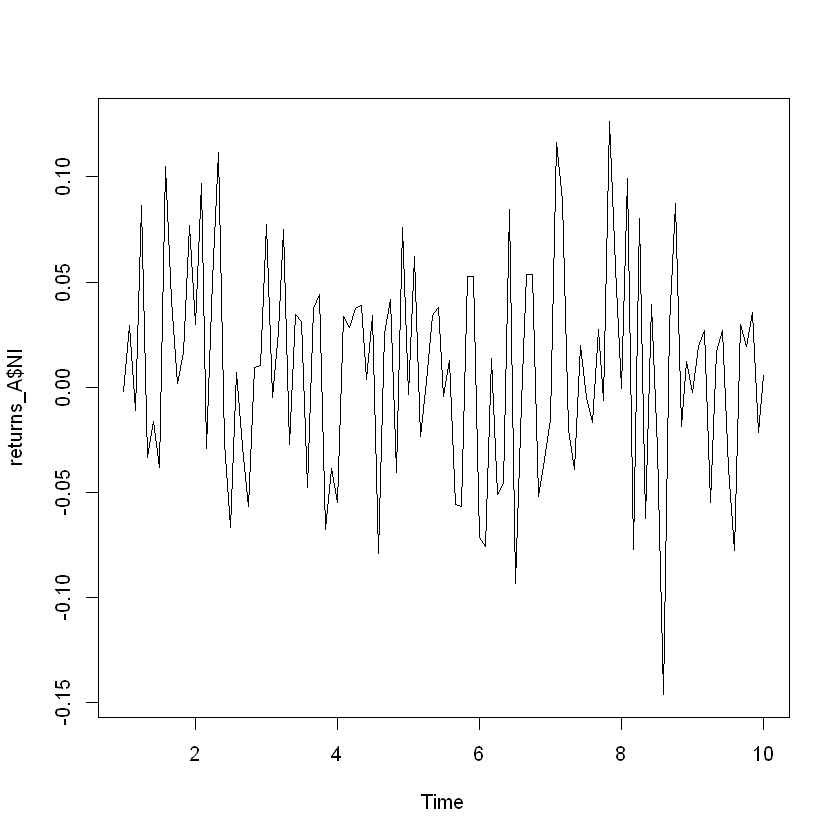

In [10]:
# Test
head(returns_A)
plot.ts(returns_A$NI)

Using the code above, we simply prepared the data for 2 portfolios based on the defined time intervals, stock tickers, and variables needed for further analysis. Finally, simple returns instead of prices are assumed. We could also use the logarithmic returns for the analysis in other scenario.

We proceed with the porfolio specification and analysis using the PortfolioAnalytics package tools.

Portfolio specification

In [12]:
# Portfolio specification
portfolio_A <- portfolio.spec(assets=names(returns_A))
portfolio_B <- portfolio.spec(assets=names(returns_B))

In [13]:
# Check portfolio
print.default(portfolio_A) # Equal weights are assumed at the beginning

$assets
  NI  BEN VRSK  ETR  PXD MTCH  CPB  SYK  CAH  MRK 
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 

$category_labels
NULL

$weight_seq
NULL

$constraints
list()

$objectives
list()

$call
portfolio.spec(assets = names(returns_A))

attr(,"class")
[1] "portfolio.spec" "portfolio"     


Portfolio constraints

In [16]:
constraints <- function(portfolio) {
    portfolio <- add.constraint(
    portfolio = portfolio,
    type = "leverage",
    min_sum = 0.99,
    max_sum = 1.01
    )
    portfolio <- add.constraint(
        portfolio = portfolio,
        type = "full_investment"
    )
    portfolio <- add.constraint(
        portfolio = portfolio,
        type = "box",
        min = 0.05,
        max = 0.4
    )
    return(portfolio)
}

objective <- function(portfolio) {
    portfolio <- add.objective(
        portfolio, 
        type="risk", 
        name="var"
    )
}

In [17]:
portfolio_A <- constraints(portfolio_A)
portfolio_B <- constraints(portfolio_B)

portfolio_A <- objective(portfolio_A)
portfolio_B <- objective(portfolio_B)

After the portfolio specification, we defined the constraints and objective for the optimization. We used the "leverage" constraint to optimize companies shares assuming their leverage boundaries, "full investment" to use the whole portfolio and "box" constraint to keep all companies at least with some minimal share involved while not distorting the portfolio by too high share. Moreover, the objective of type "risk" is set since we aim to minimize the volatility and thus the level of riskiness given the returns. 

In [18]:
opt_portfolio_A <- optimize.portfolio(
    R = returns_A,
    portfolio = portfolio_A,
    optimize_method = "ROI",
    trace = TRUE
)
opt_portfolio_A

Registered S3 method overwritten by 'ROI':
  method           from              
  print.constraint PortfolioAnalytics



***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = returns_A, portfolio = portfolio_A, optimize_method = "ROI", 
    trace = TRUE)

Optimal Weights:
    NI    BEN   VRSK    ETR    PXD   MTCH    CPB    SYK    CAH    MRK 
0.1976 0.0500 0.1127 0.0500 0.0500 0.0540 0.1761 0.0500 0.0500 0.2096 

Objective Measure:
 StdDev 
0.03653 




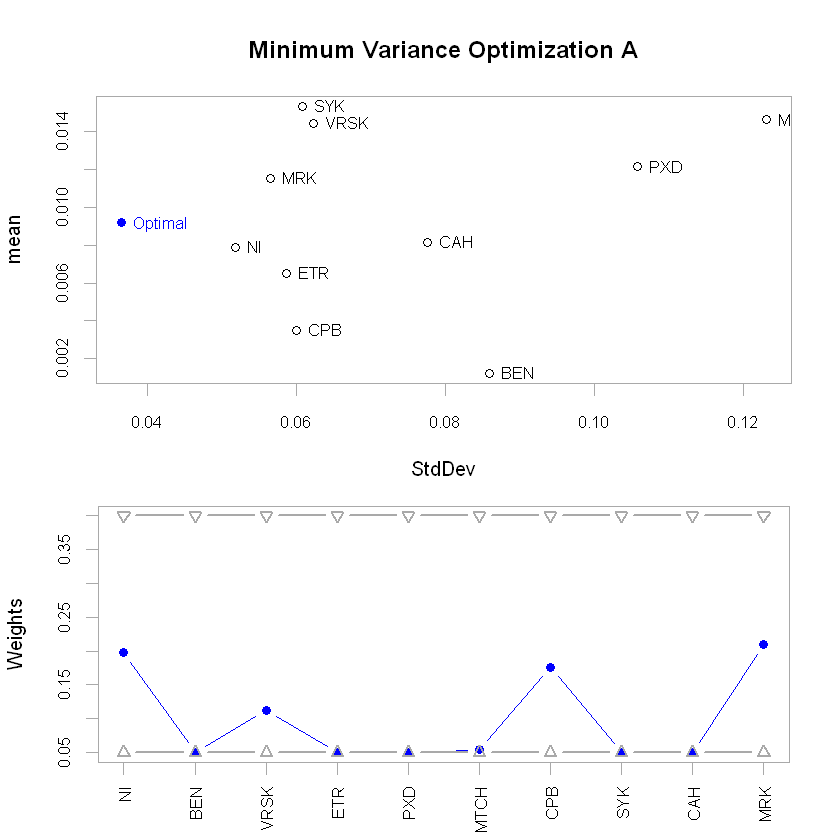

In [19]:
plot(
    opt_portfolio_A,
    risk.col = "StdDev",
    return.col = "mean",
    main = "Minimum Variance Optimization A",
    chart.assets = TRUE,
)

In [20]:
opt_portfolio_B <- optimize.portfolio(
    R = returns_B,
    portfolio = portfolio_B,
    optimize_method = "ROI",
    trace = TRUE
)
opt_portfolio_B

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = returns_B, portfolio = portfolio_B, optimize_method = "ROI", 
    trace = TRUE)

Optimal Weights:
  CINF    AOS   TROW    OMC    HAL     CL    MTB    CSX    SJM    NEE 
0.0553 0.0500 0.0500 0.0500 0.0500 0.2133 0.0500 0.0500 0.2071 0.2242 

Objective Measure:
 StdDev 
0.03817 




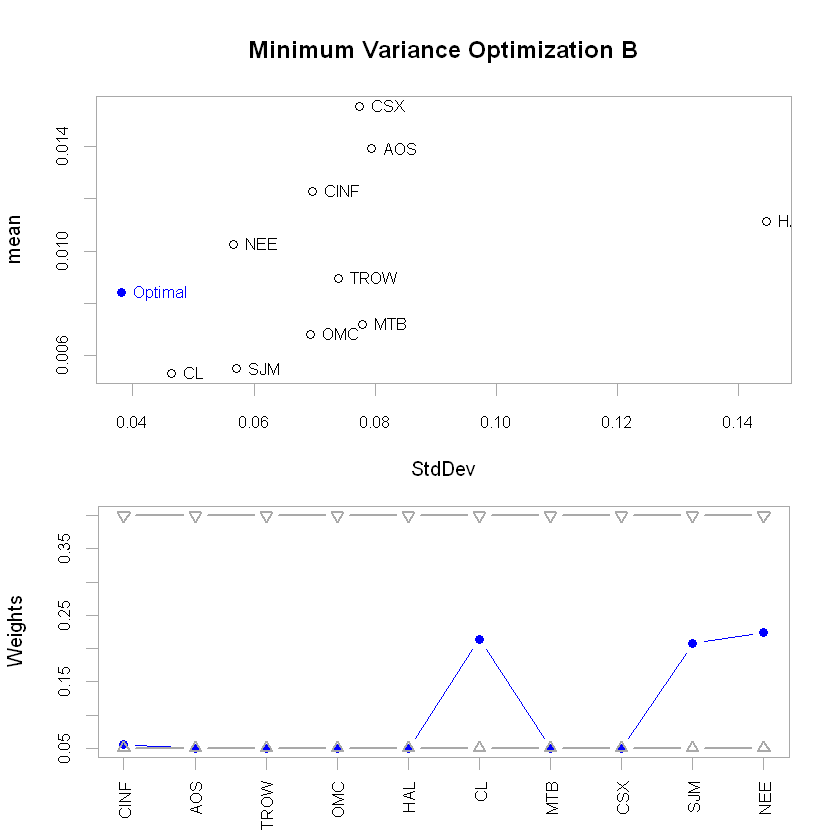

In [21]:
plot(
    opt_portfolio_B,
    risk.col = "StdDev",
    return.col = "mean",
    main = "Minimum Variance Optimization B",
    chart.assets = TRUE,
)

The optimizations methods basically aim to find the stocks that minimize the total portfolio variance given their returns (resulting from the teory that assumes diversification can lower the idiosyncratic risk while keeping only the systematic risk). The results find the important stocks for portfolio A (NI, VRSK, CPB, MRK) and portfolio B (CL, SJM, NEE). These stocks seem to be the best in terms of returns given their riskiness.

With the same logic, we can use the Sharp ratio (reward-to-volatility) to compare our 2 portfolios.

In [23]:
# Create efficient frontiers
EF_A <- create.EfficientFrontier(R = returns_A, portfolio = portfolio_A, type = 'mean-var')
EF_B <- create.EfficientFrontier(R = returns_B, portfolio = portfolio_B, type = 'mean-var')

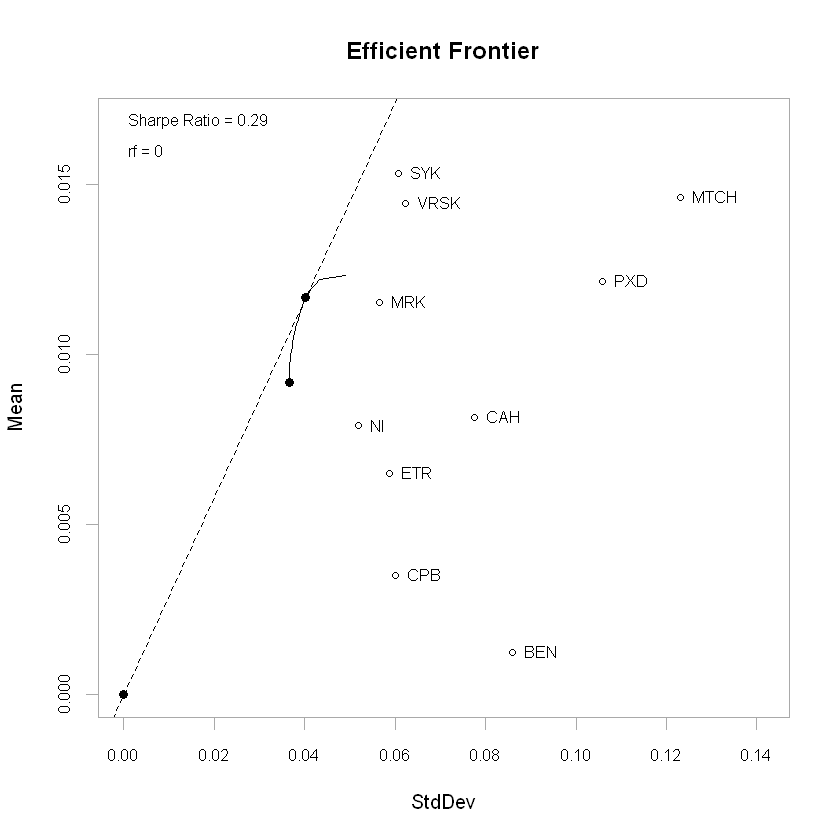

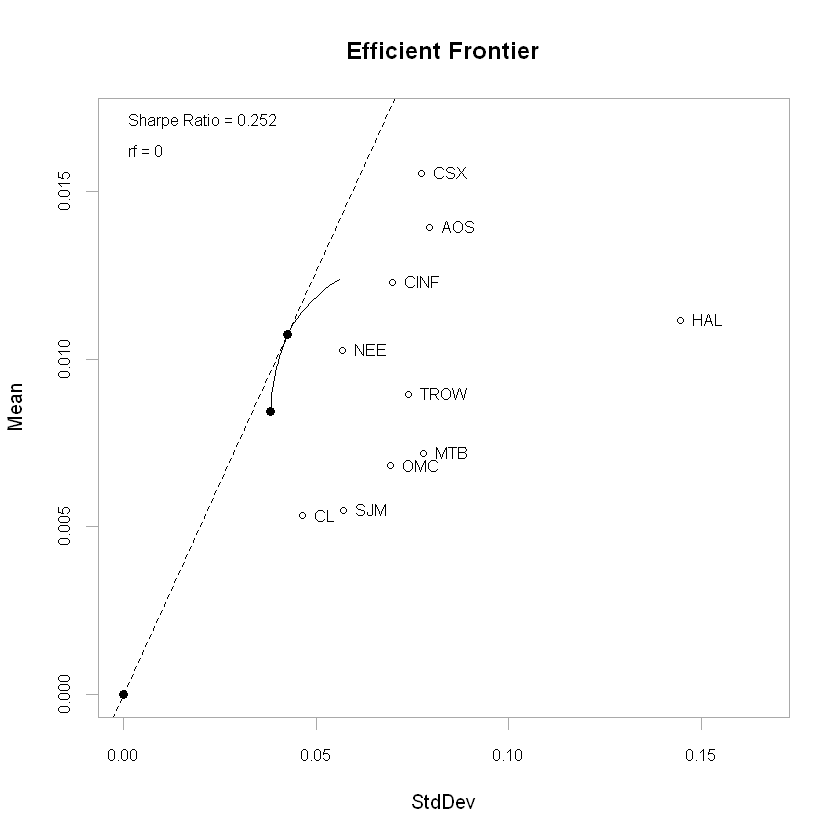

In [29]:
# Plot the efficient frontier A
chart.EfficientFrontier(EF_A, match.col = 'StdDev', type = 'l', pch = 4, RAR.text = 'Sharpe Ratio')

# Plot the efficient frontier B
chart.EfficientFrontier(EF_B, match.col = 'StdDev', type = 'l', pch = 4, RAR.text = 'Sharpe Ratio')

Based on these results, we would choose the portfolio A given its higher Sharp ratio. However, there other also metrics to compare the portfolio performance (portfolio drawdown, benchmarking, M^2 measure, Treynor ratio) but it depends on the investing objective.

## Task 3

In [1]:
shhh = suppressPackageStartupMessages #load quietly
shhh(library(xts))
shhh(library(dplyr))
shhh(library(ggplot2))
shhh(library(quantmod))

Load the data

In [2]:
portfolio_A_prices <- readRDS("task3_A.rds")
portfolio_B_prices <- readRDS("task3_B.rds")
market_cap_xts_sub <- readRDS("task3_market_cap.rds") 

Load the tickers 

In [3]:
# Load the tickers
zip_path = "data_HW1.zip"
csv_file = "98698413_rand_download.csv" # Pavlina's student number
temp = tempfile() # temporary file path for unzipping
unzip(zip_path, files = csv_file, exdir = temp) # unzip into the temp directory
csv_path = file.path(temp, csv_file)
tickers = read.csv(csv_path)
unlink(temp, recursive = TRUE) # just a clean-up: delete temp directory

Prepare adjusted prices

In [5]:
adjusted_prices <- merge(portfolio_A_prices, portfolio_B_prices)
head(adjusted_prices)

         NI.Adjusted BEN.Adjusted VRSK.Adjusted ETR.Adjusted PXD.Adjusted
Jan 2015    12.66333     34.71178      62.18811     59.75258     116.5771
Feb 2015    12.63461     36.26110      69.39750     54.85009     118.1183
Mar 2015    13.00266     34.67082      69.00125     53.45658     126.6603
Apr 2015    12.86009     34.83295      72.51896     53.24274     133.8411
May 2015    13.97371     34.39382      70.14163     53.33473     114.5141
Jun 2015    13.50279     33.22279      70.31558     49.17090     107.4339
         MTCH.Adjusted CPB.Adjusted SYK.Adjusted CAH.Adjusted MRK.Adjusted
Jan 2015      16.56477     34.67088     81.48782     63.14388     43.28312
Feb 2015      18.32316     35.31517     84.79923     66.78722     42.03375
Mar 2015      18.33675     35.28485     82.87417     68.77966     41.60660
Apr 2015      18.97542     34.12041     82.86517     64.26143     43.11220
May 2015      20.40225     36.89065     86.35980     67.17962     44.07491
Jun 2015      21.64970     36.36

In [6]:
is.xts(adjusted_prices)

[1] TRUE

Using the adjusted stocks prices is intentional to take care of all the stock splits and received dividents since they are reflected inside these prices. Using the close prices, on the other hand, we would have to take care of stock splits to not distort our index.

Prepare market capitalizations

In [7]:
subset_market_cap <- function(xts_data, tickers, start, end) {
  subset <- list()
  date_range <- paste(start, end, sep = "/")
  
  for(ticker in tickers) {
    # Subset
    subset[[ticker]] = xts_data[[ticker]][date_range, ]
    # Convert to monthly
    subset[[ticker]] = to.monthly(subset[[ticker]], OHLC=FALSE)
    } 
  return(subset)
}

In [9]:
# Keep the same time interval, frequency and stocks as for adjusted prices
start = as.Date("2015-01-01")
end = as.Date("2024-02-29")

market_cap_list <- subset_market_cap(market_cap_xts_sub, tickers$x, start, end)

In [10]:
market_cap <- do.call(merge, market_cap_list)
colnames(market_cap) <- tickers$x
head(market_cap)

            NI   BEN  VRSK   ETR   PXD MTCH   CPB   SYK   CAH    MRK CINF  AOS
Jan 2015 13.70 31.82 10.17 15.72 22.43   NA 14.32 34.50 27.45 170.89 8.28 5.31
Feb 2015 13.59 33.25 11.35 14.28 22.73   NA 14.49 35.90 29.04 165.96 8.65 5.64
Mar 2015 13.98 31.70 11.29 13.92 24.36   NA 14.48 34.95 29.79 162.96 8.74 5.87
Apr 2015 13.79 31.66 12.32 13.86 25.74   NA 13.90 34.77 28.00 168.32 8.31 5.70
May 2015 14.98 31.26 11.91 13.73 22.03   NA 15.08 36.24 29.27 172.08 8.30 6.36
Jun 2015 14.47 30.11 11.94 12.66 20.66   NA 14.87 36.03 27.77 160.88 8.23 6.42
          TROW   OMC   HAL    CL   MTB   CSX   SJM   NEE
Jan 2015 20.36 17.94 33.99 61.29 14.94 33.00 10.44 48.32
Feb 2015 21.37 19.60 36.50 64.28 15.98 34.00 11.89 45.76
Mar 2015 20.95 19.21 37.30 62.94 16.77 32.82 11.92 46.02
Apr 2015 20.92 18.52 41.71 60.86 15.84 35.66 11.94 44.96
May 2015 20.79 18.22 38.68 60.42 16.00 33.67 14.12 45.59
Jun 2015 20.03 16.99 36.70 59.17 16.54 32.26 12.91 43.67

#### a) Simple price-weighted index

In [28]:
total_price <- rowSums(adjusted_prices, na.rm = TRUE)
# Number of stocks present in the index for a given period (not NA price)
stocks_amount <- as.vector(apply(adjusted_prices, 1, function(row) sum(!is.na(row))))

price_index <- total_price / stocks_amount
head(price_index)

[1] 49.34299 51.62703 52.12604 52.21731 51.87231 50.28378

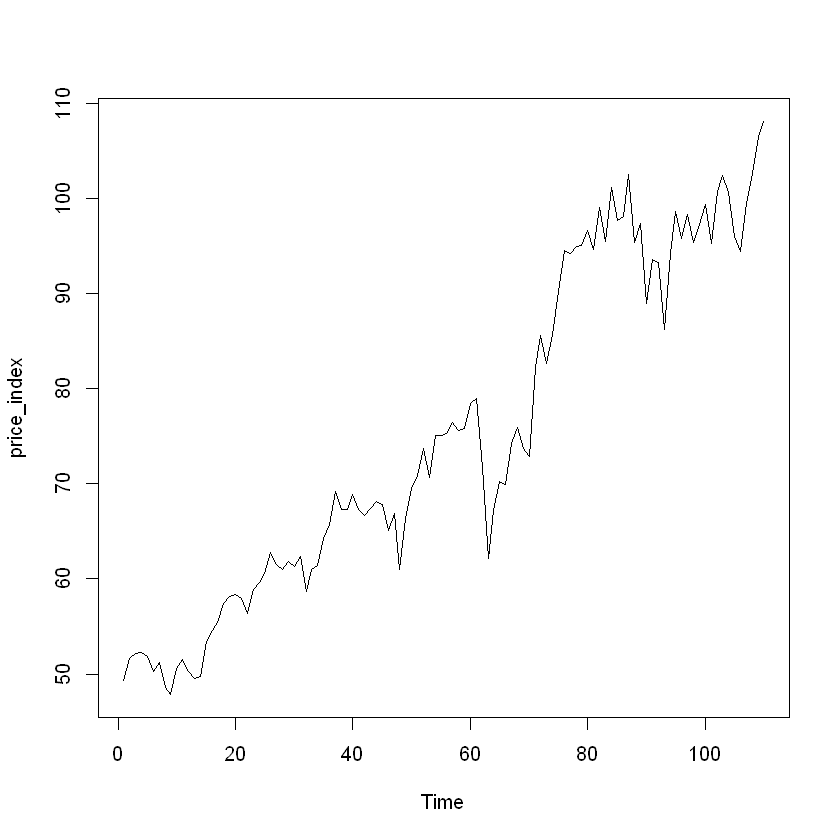

In [29]:
plot.ts(price_index)

The price-weighted index is a simple way for computing an index, however, bears several disadvantages. For example, company size is not taking into account at all so that smaller companies can gain higher weight in the index that intended and thus affect its total value more significantly. Example of this method can be the DJIA index. 

#### b) Market-capitalization weighted index

In [31]:
total_market_cap <- rowSums(market_cap, na.rm = TRUE)
weights_market <- market_cap / total_market_cap

market_index <- rowSums(weights_market * adjusted_prices, na.rm=TRUE)
head(market_index)

[1] 47.87035 49.46791 49.86285 50.18394 49.70618 47.95933

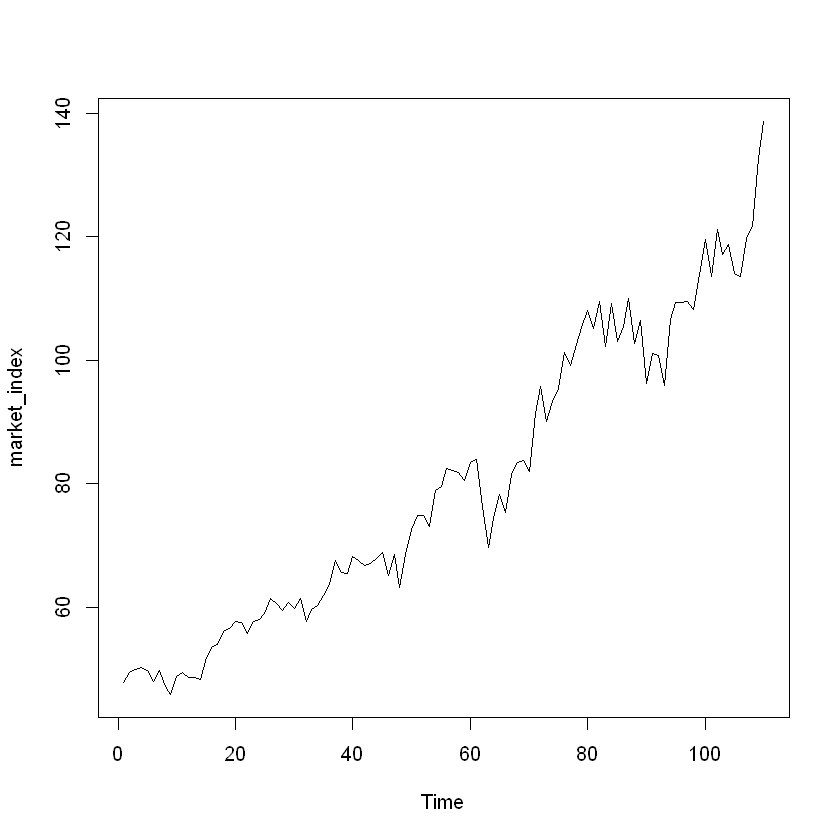

In [92]:
plot.ts(market_index)

The market-cap-weighted index allows us to take into account individual companies size. Moreoover, it does not have to be adjusted for stock splits and dividends since the market capitalization is not affected by these processes. In this way, the index more closely represents the total market and changes in market wealth given the companies sizes weights. On the other hand, the overvalued stocks can have disproportionally higher weights in the index as their price rises. Example of this method can be the S&P500 index.

#### c) Equally-weighted index

In [32]:
weights_equal <- 1 / length(tickers$x)

equal_index <- rowSums(weights_equal * adjusted_prices, na.rm=TRUE)
head(equal_index)

[1] 49.34299 51.62703 52.12604 52.21731 51.87231 50.28378

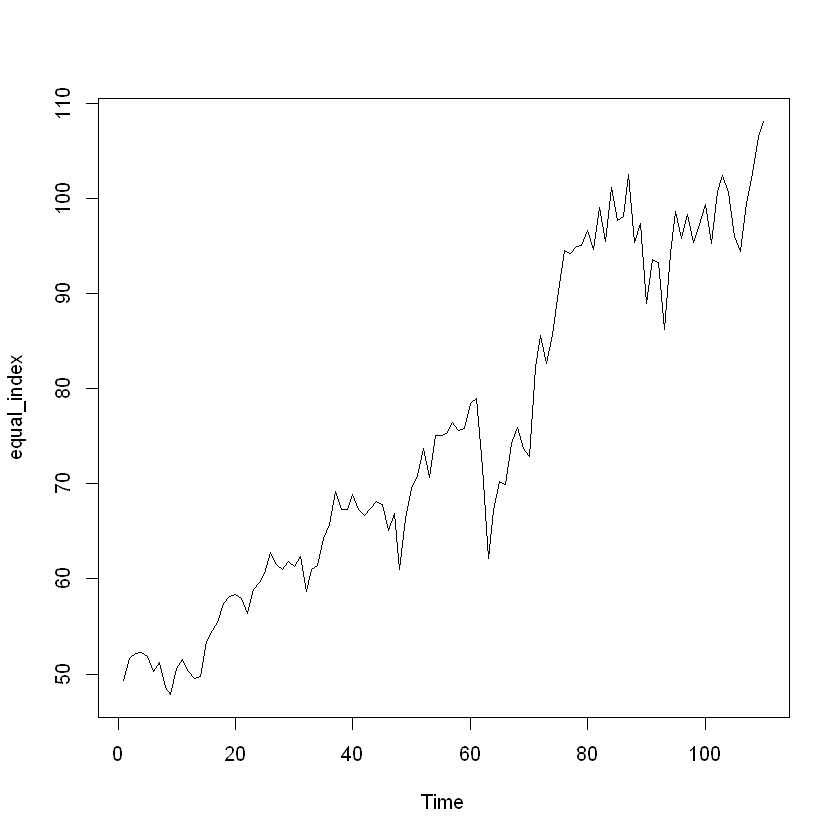

In [102]:
plot.ts(equal_index)

Calculating the equal-weighted index using companies prices allows us to include all companies equally not affected by their size or other specifications. The disproportionate proxy for a size of a firm can, however, once again result in small companies affecting the whole index. Example of this method can be the Value Line Composite index.

,Date,price_index,market_index,equal_index
,<yearmon>,<dbl>,<dbl>,<dbl>
1,Jan 2015,49.34299,47.87035,49.34299
2,Feb 2015,51.62703,49.46791,51.62703
3,Mar 2015,52.12604,49.86285,52.12604
4,Apr 2015,52.21731,50.18394,52.21731
5,May 2015,51.87231,49.70618,51.87231
6,Jun 2015,50.28378,47.95933,50.28378


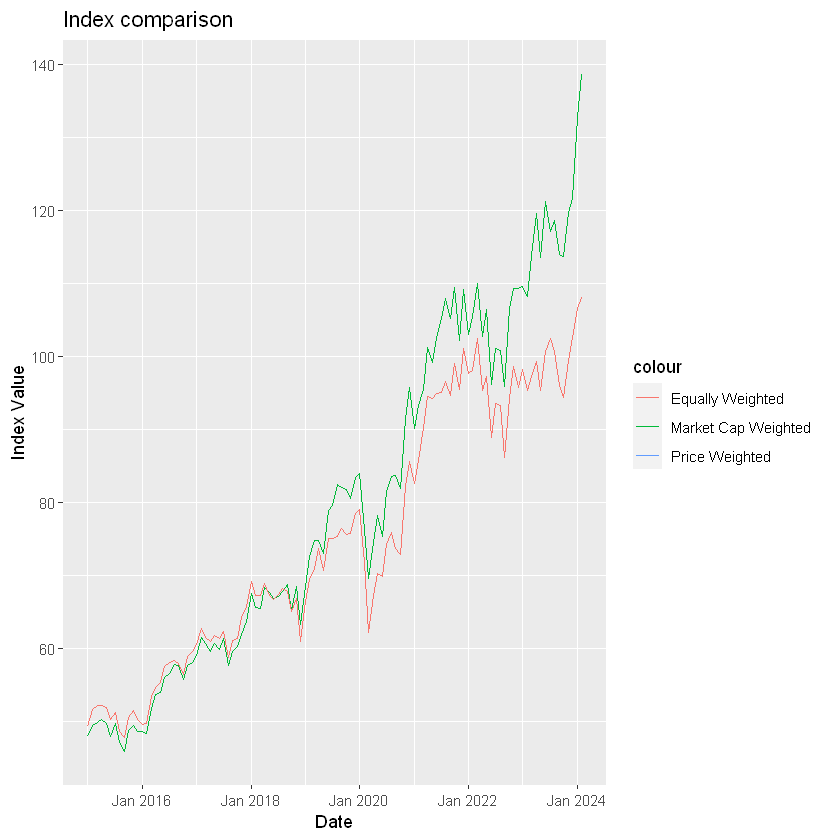

In [35]:
# Data frame
indices_df <- data.frame(Date=index(adjusted_prices), 
                        price_index=price_index,
                        market_index=market_index,
                        equal_index=equal_index)
head(indices_df)

# Plotting
ggplot(indices_df, aes(x=Date)) +
  geom_line(aes(y=price_index, colour="Price Weighted")) +
  geom_line(aes(y=market_index, colour="Market Cap Weighted")) +
  geom_line(aes(y=equal_index, colour="Equally Weighted")) +
  labs(title="Index comparison", y="Index Value")

The results show that the market-weighted index achieves higher values most of the times. It can be given by the larger firms in terms of market capitalization strongly affecting the overall index and thus pushing its price higher. The price-weighted and equally-weighted indexes seem to be identical given their proportional equal shares of all included stocks. 